In [54]:
import os
os.chdir(r'D:\2023\Sadj\x13as_ascii-v1-1-b59\x13as')
from datetime import datetime as dt
import time

import numpy as np
import pandas as pd
import openpyxl
import pprint as pp

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Python set up modules loaded")
print("Python version:\n", os.sys.version, "\nPlatform: ", os.sys.platform)
print("Base directory path:", os.getcwd())
print("Data/time:", dt.now())

import statsmodels as sma
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.x13 import x13_arima_select_order, _find_x12

print("STATSMODELS info (statsmodels._version.version_json)", sma._version.version_json)

# x12_path = 'D:\2023\Sadj\x13as_ascii-v1-1-b59\x13as'
#
# I finally solved the problem by 
# 1)changing x13as_ascii.exe to x13as.exe
# 2)import os
# os.chdir(r'C:\Users\user-name\Downloads\x13as_ascii-v1-1-b59\x13as')
#

Python set up modules loaded
Python version:
 3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)] 
Platform:  win32
Base directory path: D:\2023\Sadj\x13as_ascii-v1-1-b59\x13as
Data/time: 2023-07-06 22:57:13.516364
STATSMODELS info (statsmodels._version.version_json) 
{
 "date": "2021-11-12T23:19:44+0000",
 "dirty": false,
 "error": null,
 "full-revisionid": "70647db97dd1eb65399ee18d474c257d466e33b4",
 "version": "0.13.1"
}



In [52]:
# 데이터 저장 위치에 excel files  확인
data_path = 'D:/2023/Data_WareHouse/ECOS(한국은행경제통계)/Data_02'
data_list = [file for file in os.listdir(data_path) if file.endswith(".xlsx")]
data_list.sort()
for d, f in enumerate(data_list):
  print(data_list[d])

M2.xlsx
dataset_01.xlsx
계열정리.xlsx
기계수주액_01134039.xlsx
변수목록_d.xlsx
복수통계_01140009.xlsx
선택계열.xlsx
신용카드_01140906.xlsx
아파트 매매 실거래가격지수_01135002.xlsx


In [61]:
# !pwd
# !pip show pandas

pd.__version__

'1.5.3'

In [64]:
dta = sm.datasets.co2.load_pandas().data
dta.co2.interpolate(inplace=True)
dta = dta.resample('M').sum()

In [66]:
type(dta)
dta

pandas.core.frame.DataFrame

,co2
1958-03-31,316.10
1958-04-30,1268.80
1958-05-31,1587.05
1958-06-30,1266.70
1958-07-31,1262.50
...,...
2001-08-31,1477.70
2001-09-30,1839.40
2001-10-31,1472.20
2001-11-30,1477.50


In [67]:
res = sm.tsa.x13_arima_select_order(dta.co2)#, x12path=x12_path)
print(res.order, res.sorder)

(3, 0, 1) (0, 1, 1)


c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


In [45]:
_find_x12()

'x13as.exe'

c:\Users\PC\AppData\Local\Programs\Python\Python38\lib\site-packages\statsmodels\tsa\x13.py:187: X13Warning: WARNING: At least one visually significant trading day peak has been
          found in the estimated spectrum of the regARIMA residuals.
  
          found in one or more of the estimated spectra.
  warn(errors, X13Warning)


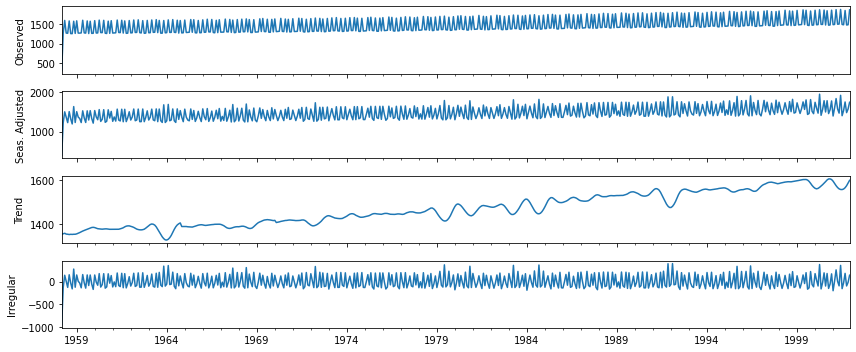

In [46]:
results = sm.tsa.x13_arima_analysis(dta.co2)

fig = results.plot()
fig.set_size_inches(12, 5)
fig.tight_layout()